# Breadth-First Search

### What is BFS?
Breadth-first search is a graph traversal algorithm that visits all nodes at a given depth before moving to deeper levels. It is used in shortest path algorithms, maze solving, and web crawlers, among others.

## Code

In [ ]:
#Preamble
import multiprocessing
from time import time
import math
import random
import matplotlib.pyplot as plt
import graphviz

### Visualisation Tools

In [ ]:
def renderTree(tree, s):
  dot = graphviz.Digraph()
  #create nodes of the tree
  for i in range(1, len(tree)):
    dot.node(str(i), str(i))
    
  #add connections of the tree
  for i in range(1, len(tree)):
    if i == s: #root nodes are identified as parents of themselves in code. This statements avoids drawing the self-loop.
      continue
    dot.edge(str(tree[i]), str(i))

  return dot

In [ ]:
def renderGraph(graph):
  dot = graphviz.Graph()
  #create nodes of the tree
  for u in graph:
    dot.node(str(u), str(u))
    
  #add connections of the tree
  visited = set()
  for u in graph:
    visited.add(u) # to avoid double counting edges
    for v in graph[u]:
      if v not in visited:
        dot.edge(str(u), str(v))

  return dot

### Graph Generation

In [ ]:
def generateGraph(nodes): #create a graph with the desired number of nodes and random connections/neighbours
  graph = {}
  for i in range(1, nodes+1):
    if i not in graph:
      graph[i] = []

    connections = random.sample(range(1, nodes+1), random.randint(0, nodes)) #this assigns random neighbours to a node. Note that more neighbours can be added if a later node generates this current node as a neighbour.
    for connection in connections:
      if connection == i: #avoid self-loops
        continue
      if connection not in graph[i]:
        graph[i].append(connection)
        
        if connection not in graph:
          graph[connection] = []

        graph[connection].append(i)
  return graph

In [ ]:
def generateCompleteGraph(nodes): #creates a complete graph of desired number of nodes - all nodes connected to each other
  graph = {}
  for i in range(1, nodes+1):
    graph[i] = list(range(1, nodes+1))
    graph[i].remove(i)
  return graph

In [ ]:
def generateCyclicGraph(nodes): #creates a cyclic graph of desired number of nodes.
  graph = {}
  for i in range(1, nodes+1):
    graph[i] = []
    #connect to a next node and a previous node
    graph[i].append(i-1 if i > 1 else nodes)
    graph[i].append(i+1 if i < nodes else 1)
  return graph

In [ ]:
graph = generateGraph(10)
for u in graph:
  print(f"{u} : {graph[u]}")

graph = generateCompleteGraph(10)
for u in graph:
  print(f"{u} : {graph[u]}")

graph = generateCyclicGraph(10)
for u in graph:
  print(f"{u} : {graph[u]}")

1 : [2, 4, 5, 7, 10]
2 : [10, 1, 7, 8, 5, 3, 9, 6, 4]
10 : [2, 4, 5, 8, 9, 7, 6, 3, 1]
7 : [2, 4, 5, 3, 1, 6, 8, 9, 10]
8 : [2, 3, 5, 7, 4, 10, 6, 9]
5 : [2, 3, 8, 7, 1, 10, 6]
3 : [2, 8, 5, 7, 10]
9 : [2, 6, 8, 7, 10]
6 : [2, 4, 5, 9, 7, 8, 10]
4 : [2, 10, 1, 7, 6, 8]
1 : [2, 3, 4, 5, 6, 7, 8, 9, 10]
2 : [1, 3, 4, 5, 6, 7, 8, 9, 10]
3 : [1, 2, 4, 5, 6, 7, 8, 9, 10]
4 : [1, 2, 3, 5, 6, 7, 8, 9, 10]
5 : [1, 2, 3, 4, 6, 7, 8, 9, 10]
6 : [1, 2, 3, 4, 5, 7, 8, 9, 10]
7 : [1, 2, 3, 4, 5, 6, 8, 9, 10]
8 : [1, 2, 3, 4, 5, 6, 7, 9, 10]
9 : [1, 2, 3, 4, 5, 6, 7, 8, 10]
10 : [1, 2, 3, 4, 5, 6, 7, 8, 9]
1 : [10, 2]
2 : [1, 3]
3 : [2, 4]
4 : [3, 5]
5 : [4, 6]
6 : [5, 7]
7 : [6, 8]
8 : [7, 9]
9 : [8, 10]
10 : [9, 1]


### Sample Graph

In [ ]:
# Store graph as an adjacency list
graph = {
    1 : [2, 3],
    2 : [1, 4, 5],
    3 : [1, 5, 6],
    4 : [2, 3, 6],
    5 : [2, 3],
    6 : [3, 4, 7],
    7 : [6]
}

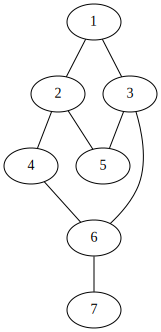

In [ ]:
renderGraph(graph)

### Sequential Implementation
Create a list of nodes (*front*, short for frontier) who's neighbours need to be explored. One by one, go through the neighbours of each of these nodes. For any new nodes encountered, add them to *newFront* (frontier for the next iteration) and assign the current node as the parent of these nodes for the creation of the bfs tree. Continue until *front* is empty.

In [ ]:
def seqBFS(G, s):
  front = [s]
  tree = [0]*(len(G)+1)
  tree[s] = s # make s it's own parent

  while len(front) != 0:
    newFront = []
    for v in front: #for each node in current stage of bfs
      for u in G[v]: #go through each neighbour
        if tree[u] == 0: #update unassigned neighbours
          tree[u] = v
          newFront.append(u)
    front = newFront
  return tree

In [ ]:
def seqBFS_wrapper(G): #fix starting node
  return seqBFS(G, 1)

[0, 1, 1, 1, 2, 2, 3, 6]


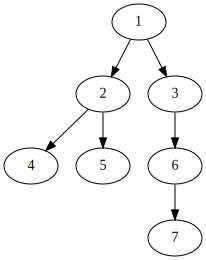

In [ ]:
seqTree = seqBFS(graph, 1)
print(seqTree)
renderTree(seqTree, 1)

### Parallel Implementation
Create a list of nodes (*front*, short for frontier) who's neighbours need to be explored. One by one, go through the neighbours of each of these nodes. For any new nodes encountered, add the edge connecting them to the previous edge to *e* which is an edge list. Process each edge in parallel, assigning the previous vertex as the parent of the new vertex in the tree. By using concurrent write, we ensure that if in one level of exploration there are multiple ways to visit a node, we allow only one such path to be stored and overwrite the rest. 

Finally, to generate the *front* for the next stage, we go through each edge in *e* and take the new vertex from it, if in the tree, the old vertex is its parent. This ensures that a vertex is stored only once as it can only have one parent in the tree even if multiple paths led to it. Continue until *front* is empty.

The parallel implementation code takes great inspiration from the following:

Blelloch, G.E. and Maggs, B.M. (2010). Parallel Algorithms. School of Computer Science, Carnegie Mellon University. pp. 22-24

In [ ]:
def parrBFS(G, s):
  front = [s]
  tree = multiprocessing.Array('i', len(G)+1) #allows concurrent write
  tree[s] = s
  while len(front) != 0:
    e = []
    for v in front: #make parallel
      for u in G[v]:
        e.append((u, v)) #stores edge in reverse
    e = list(filter(lambda x : tree[x[0]] == 0, e)) #only store edges which have not been previously visited
    
    processes = []
    for edge in e:
      p = multiprocessing.Process(target = setVal, args = [tree, edge]) #concurrent write. Only one parent assigned per node.
      p.start()
      processes.append(p)

    for p in processes:
      p.join()
    
    front = [edge[0] for edge in e if edge[1] == tree[edge[0]]] #create a list of new front. Ensures that no node is considered more than once as we only consider the edges
  
  return list(tree)

In [ ]:
def setVal(a, v): #assign parent
  a[v[0]] = v[1]

In [ ]:
def parrBFS_wrapper(G):
  return parrBFS(G, 1)

[0, 1, 1, 1, 2, 3, 3, 6]


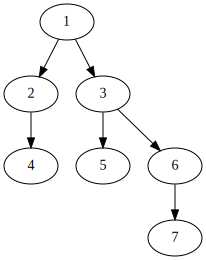

In [ ]:
parrTree = parrBFS(graph, 1)
print(parrTree)
renderTree(parrTree, 1)

[0, 1, 1, 1, 2, 2, 3, 6]


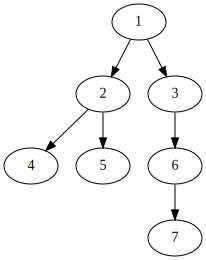

In [ ]:
parrTree2 = parrBFS(graph, 1)
while parrTree2 == parrTree:
  parrTree2 = parrBFS(graph, 1)
print(parrTree2)
renderTree(parrTree2, 1)

### Other Examples

Random Graph

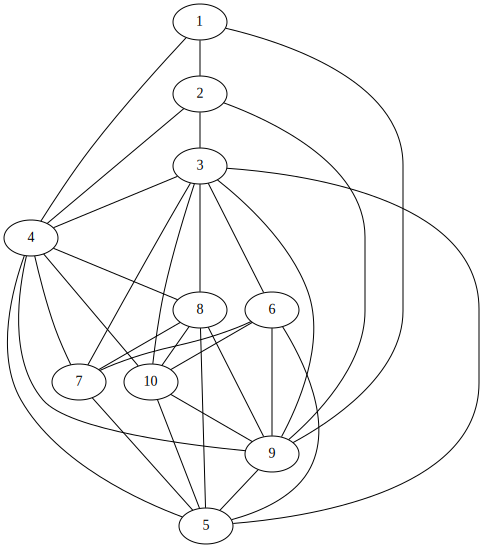

In [ ]:
graph = generateGraph(10)
renderGraph(graph)

[0, 1, 1, 2, 1, 4, 9, 4, 4, 1, 4]


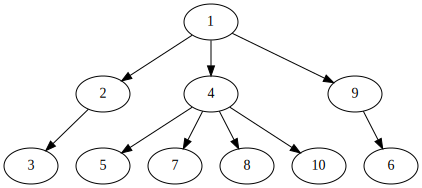

In [ ]:
seqTree = seqBFS(graph, 1)
print(seqTree)
renderTree(seqTree, 1)

[0, 1, 1, 9, 1, 9, 9, 4, 9, 1, 9]


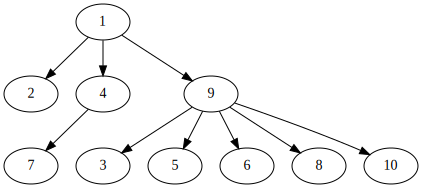

In [ ]:
parrTree = parrBFS(graph, 1)
print(parrTree)
renderTree(parrTree, 1)

Complete Graph

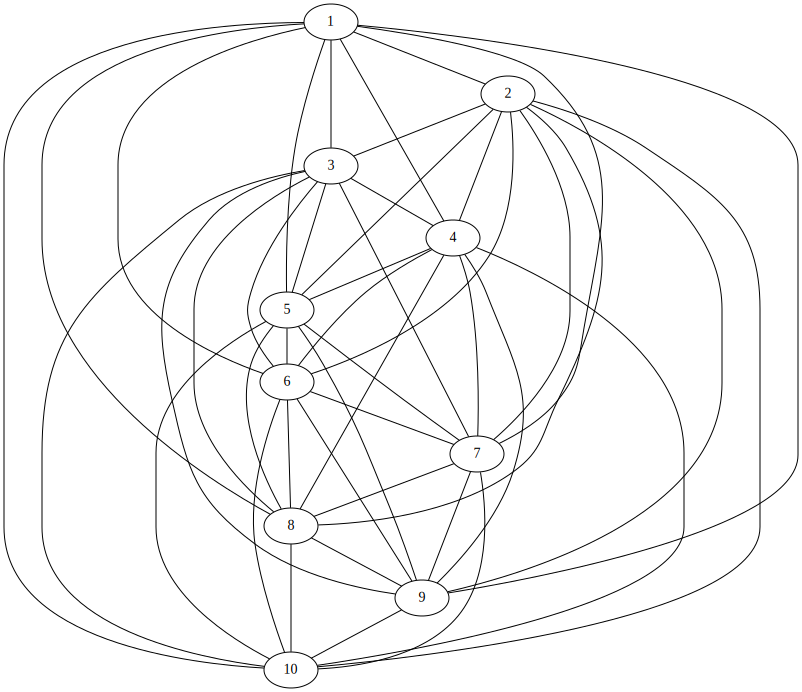

In [ ]:
graph = generateCompleteGraph(10)
renderGraph(graph)

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


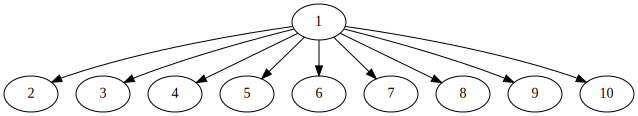

In [ ]:
seqTree = seqBFS(graph, 1)
print(seqTree)
renderTree(seqTree, 1)

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


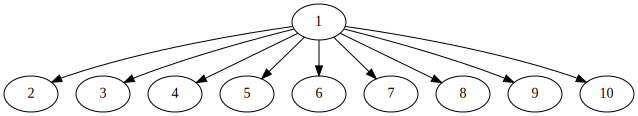

In [ ]:
parrTree = parrBFS(graph, 1)
print(parrTree)
renderTree(parrTree, 1)

Cyclic Graph

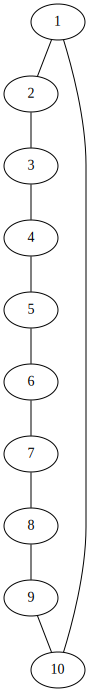

In [ ]:
graph = generateCyclicGraph(10)
renderGraph(graph)

[0, 1, 1, 2, 3, 4, 7, 8, 9, 10, 1]


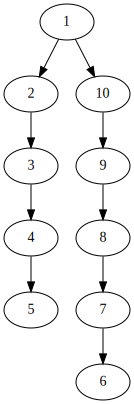

In [ ]:
seqTree = seqBFS(graph, 1)
print(seqTree)
renderTree(seqTree, 1)

[0, 1, 1, 2, 3, 4, 5, 8, 9, 10, 1]


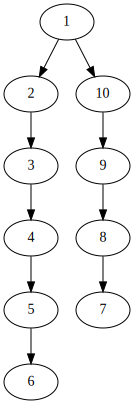

In [ ]:
parrTree = parrBFS(graph, 1)
print(parrTree)
renderTree(parrTree, 1)

### Result
We see that a parallel BFS implementation, while it is able to generate a valid BFS tree, it does not necessarily create the same graph for the same input each time, showing the element of randomness of execution when tasks are done in parallel.